<a href="https://colab.research.google.com/github/Nagakiran1/Crowd-Counting/blob/main/CrowdCouting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

uploaded = files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json




import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import models
from matplotlib import pyplot as plt
from scipy import stats
import cv2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# Importig required Libaries
from keras.callbacks import TensorBoard
from keras.layers import Activation, Dense, Flatten, Cropping2D, Conv2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Lambda
from keras.models import model_from_json
#from keras.backend import tf as ktf
import csv
import pickle
import cv2
from pandas import DataFrame
import numpy as np
from IPython.core.debugger import set_trace

import warnings
warnings.filterwarnings("ignore")


# train_datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False,
#                                    samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-6, rotation_range=10, width_shift_range=0.2, 
#                                    height_shift_range=0.2,shear_range=0, zoom_range=0.1, channel_shift_range=0., fill_mode='nearest', cval=0., 
#                                    horizontal_flip=False,vertical_flip=False, rescale=None, preprocessing_function=None,  data_format="channels_last")


Saving kaggle.json to kaggle (3).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# # Downlaod data for the nyc_taxi_trip_duration challenge
# !kaggle datasets download -d fmena14/crowd-counting
# !unzip -qq crowd-counting.zip

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive1 = GoogleDrive(gauth)


In [ ]:
%%time
IMAGE_FILE_ID = "1y0BoU7RIisMgj4PsCPbY02PPm4CEXaEF"
downloaded = drive1.CreateFile({'id':IMAGE_FILE_ID})
downloaded.GetContentFile('images.npy')        

CPU times: user 22.7 s, sys: 5.47 s, total: 28.2 s
Wall time: 1min 25s


In [ ]:
IMAGE_GT_FILE_ID = "1F8MSiZ974Hta6gZcex9DFvGwbhA2u3s8"
downloaded = drive1.CreateFile({'id':IMAGE_GT_FILE_ID})
downloaded.GetContentFile('images_gt.npy') 

In [ ]:
IMAGE_DENSITY_FILE_ID = "1-1JXmD6sumzJcATFQzm9Yq7CCDZ2K7cT"
downloaded = drive1.CreateFile({'id':IMAGE_DENSITY_FILE_ID})
downloaded.GetContentFile('images_density.npy')

In [ ]:
LABEL_FILE_ID = "1NYHK2AcLmm-sHpZWFR5vn_ejxX3KB7Mz"
downloaded = drive1.CreateFile({'id':LABEL_FILE_ID})
downloaded.GetContentFile('labels.npy')

In [ ]:
img = np.load('images.npy')
images_gt=np.load('images_gt.npy',allow_pickle=True)
images_density=np.load('images_density.npy')
labels=np.load('labels.npy')

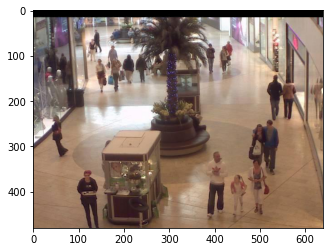

In [ ]:
plt.imshow(img[200])

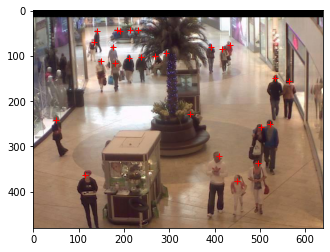

In [ ]:
plt.imshow(img[200])
plt.plot(images_gt[200][:,0],images_gt[200][:,1],'r+')

In [ ]:
## Model -1 Number of Groups in image Model

In [ ]:
%%time

def Preoprocessimage(a, ModeofImage):
  #a[np.abs(a[:,:,0]-m[:,:,0])<10] = 255
  a[np.abs(a.sum(2) - ModeofImage.sum(2))<25] = 255
  kernel = np.ones((2,2),np.uint8)
  b = cv2.morphologyEx(a, cv2.MORPH_OPEN, kernel)
  b = cv2.GaussianBlur(b,(3,3),0)
  return b


# Checking the mode values for each frame of image to remove background
ModeofImage = stats.mode(img[:10])[0][0]

# Applying background removal  preprocessing to each individual image
PreprocessedImages = []
for image in img:
  PreprocessedImages.append(Preoprocessimage(image.copy(), ModeofImage)[np.newaxis])
img1 = np.concatenate(PreprocessedImages)


labels = np.array([len(i) for i in images_gt])

# Splitting data into train and test splits
x_train, x_test, y_train, y_test = train_test_split(img1, labels, test_size=0.2, random_state=43)
print(x_train.shape[0])
print(x_test.shape[0])


# !mkdir train_data
# !mkdir test_data

# for i in range(len(x_train)):
#   cv2.imwrite('train_data/train-image-{}.jpg'.format(str(i)),x_train[i])
# for i in range(len(x_test)):
#   cv2.imwrite('test_data/test_image-{}.jpg'.format(str(i)), x_test[i])

# with open('PreprocessImages.npy', 'wb') as f:
#     np.save(f, img1)
# with open('ModeOfImage.npy', 'wb') as f:
#     np.save(f, ModeofImage)

1600
400
CPU times: user 55.9 s, sys: 4.1 s, total: 60 s
Wall time: 1min 11s


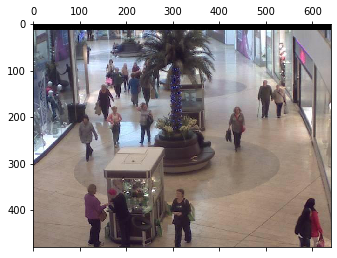

In [ ]:
a = img[13].copy()
plt.matshow(a, cmap='viridis')

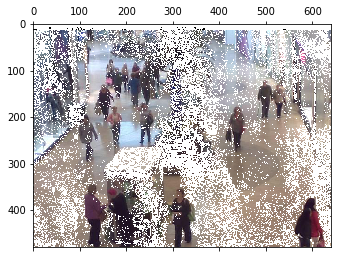

In [ ]:
dimension = 2
a = img[13].copy()
a[np.abs(a.sum(2) - ModeofImage.sum(2))<25] = 255

plt.matshow(a, cmap='viridis')

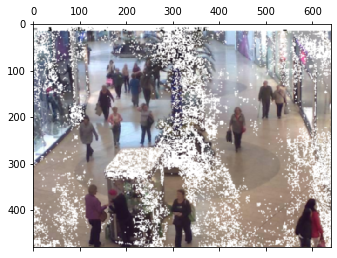

In [ ]:
kernel = np.ones((2,2),np.uint8)
b = cv2.morphologyEx(a, cv2.MORPH_OPEN, kernel)
b = cv2.GaussianBlur(b,(5,5),0)
plt.matshow(b, cmap='viridis')

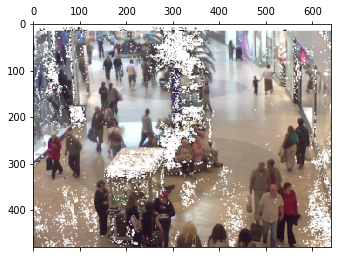

In [ ]:
plt.matshow(x_train[np.random.randint(1000)], cmap='viridis')

In [ ]:
def Pattern_Recognion_Model_API(X_train,y_train):
    '''
    Pattern Recognition model with the use Functional API method consists of 24 Sequential layers 
        6 Convolutional layers followed by relu activation layer.
        5 Fully connected layers followed bye relu activation layer.
    Convolutional layers plays important role in segregating all lane curve extractions and curvation associated information.
    Fully connected layers plays important role in reducing network size layer by layer in extracting curvature of lanes in taking the steering angle prediction
    
    Loss
    ----
    mean squared error loss is considered in optimizing the model performance
    Optimizer
    --------
    Adam optimizer is considered in changing the learning rate to converging Neural network in getting high performance in prediction
    default learning rate of 0.9 to 0.999 increment of optimization with the step of 0.001 is considered
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    
    '''

    X_input = Input(shape=X_train.shape, name='img_in')
    #X =  Cropping2D(cropping=((70, 25), (0, 0)))(X_input)
    #X = Lambda(lambda image: ktf.image.resize_images(image, (80, 200)))(X)
    X = Lambda(lambda x: (x / 255.0) - 0.5)(X_input)
    X = Conv2D(filters=6, kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=6, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros')(X)

    X = Activation('relu')(X)
    # X = Conv2D(filters=6, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
    #                  kernel_initializer='glorot_uniform', bias_initializer='zeros')(X)
    # X = Activation('relu')(X)
    X = Conv2D(filters=16, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=32,kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros')(X)
    X = Activation('relu')(X)
    # Fully connected
    X = Flatten()(X)
    # model.add(Dropout(0.35))
    X = Dense(units=1164)(X)
    X = Activation('relu')(X)
    X = Dense(units=100)(X)
    X = Activation('relu')(X)
    X = Dense(units=50)(X)
    X = Activation('relu')(X)
    X = Dense(units=10)(X)
    X = Activation('relu')(X)
    X = Dense(units=1)(X)
    model=Model(inputs=X_input, outputs=X, name='Convolve')
    model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['mse'])
    return model




def PatternRecognitionModel(input_shape):
    '''
    Pattern Recognition model consists of 24 Sequential layers 
        6 Convolutional layers followed by relu activation layer.
        5 Fully connected layers followed bye relu activation layer.
    Convolutional layers plays important role in segregating all lane curve extractions and curvation associated information.
    Fully connected layers plays important role in reducing network size layer by layer in extracting curvature of lanes in taking the steering angle prediction
    
    Loss
    ----
    mean squared error loss is considered in optimizing the model performance
    Optimizer
    --------
    Adam optimizer is considered in changing the learning rate to converging Neural network in getting high performance in prediction
    default learning rate of 0.9 to 0.999 increment of optimization with the step of 0.001 is considered
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    
    '''
    # Model
    model = Sequential()
# Convolutional
    model.add(Cropping2D(cropping=((5, 5), (0, 0)), input_shape=input_shape))
#     Lambda(lambda image: ktf.image.resize_images(image, (80, 200)))
    model.add(Lambda(lambda x: (x / 255.0) - 0.5))
    model.add(Conv2D(filters=3, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=3, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    
    model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1),use_bias=True, 
                     kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model.add(Activation('relu'))
    # Fully connected
    model.add(Flatten())
    model.add(Dense(units=1164))
    model.add(Activation('relu'))
    model.add(Dense(units=100))
    model.add(Activation('relu'))
    model.add(Dense(units=50))
    model.add(Activation('relu'))
    model.add(Dense(units=10))
    model.add(Activation('relu'))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mae'])
    return model

# Initializing the Convolutional model
model = PatternRecognitionModel(x_train[0].shape)

#model = PatternRecognitionModel_API(x_train[0].shape)
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d (Cropping2D)      (None, 470, 640, 3)       0         
_________________________________________________________________
lambda (Lambda)              (None, 470, 640, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 233, 318, 3)       228       
_________________________________________________________________
activation (Activation)      (None, 233, 318, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 115, 157, 3)       228       
_________________________________________________________________
activation_1 (Activation)    (None, 115, 157, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 78, 8)         2

In [ ]:
# Hyper parameters considered for model
batch_size = 10
epochs = 100
#Training  the model
model.fit(x_train, y_train, steps_per_epoch=int(np.ceil(len(x_train) / float(batch_size))), epochs=epochs, workers=4,
                    verbose=1, validation_data=(x_test, y_test), validation_steps=int(np.ceil(len(x_test) / float(batch_size))))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# # serialize model to JSON
# model_json = model.to_json()
# with open("drive/My Drive/project/CrowdCounting/model1.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("drive/My Drive/project/CrowdCounting/model1.h5")
# print("Saved model to disk")
 
# with open('drive/My Drive/project/CrowdCounting/ModeOfImage.npy', 'wb') as f:
#    np.save(f, ModeofImage)


 # load json and create model
json_file = open('drive/My Drive/project/CrowdCounting/model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
GroupModel = model_from_json(loaded_model_json)
# load weights into new model
GroupModel.load_weights("drive/My Drive/project/CrowdCounting/model1.h5")
print("Loaded model from disk")
 
ModeofImage = np.load(('drive/My Drive/project/CrowdCounting/ModeOfImage.npy')

Loaded model from disk


In [ ]:
print('naga')

naga


### Model output After Background removal processing of images

In [ ]:
from shapely.geometry import Point
from shapely import geometry

def AreaOfContour(x):
    return x[2]*x[3]

def FilterContours(cordinates):
    # Creating the Numpy array of filtered Contour Coordinates
    ContourInfo = np.array(cordinates)
    # Finding the Area of each contour and concatenating the area to axis of numpy array
    ContourAreas = np.apply_along_axis(AreaOfContour,1,ContourInfo)[:,None]
    ContourInfo = np.concatenate([ContourInfo,ContourAreas],axis=1)
    # Sorting the Contours based on the Area of contours
    ContourInfo = ContourInfo[ContourInfo[:,4].argsort()[::-1]]
    # Adding Flag of Table boundary to Contoursa
    ContourInfo = np.concatenate([ContourInfo,np.zeros(len(ContourInfo)).astype(int)[:,None]],axis=1)


    count = 0

    # Filtering the Inner Bounded Contours from Tables by looping the through the Contours sorted by Area,
    # All contours will be checked with the First level area contours if it fits inside, which ever iside of it, will be Deleted from that.
    while (len(ContourInfo) !=  ContourInfo[:,5].sum()):
        # Picking First level of Contour from Area
        ContourInfo[count][-1] = 1
        Cont1 = ContourInfo[count]
        x,y,w,h = Cont1[0],Cont1[1],Cont1[2],Cont1[3]
        polygon = geometry.polygon.Polygon([(x,y),(x,y+h),(x+w,y+h),(x+w,y)])

        InnerContours = []
        # Checking the Each contour one by one till it reaches to Low level and appending the rows of contours inside of it
        for val,Cont2 in enumerate(ContourInfo[count+1:]):
            #Cont2 = ContourInfo[1]
            X,Y,W,H = Cont2[0],Cont2[1],Cont2[2],Cont2[3]
            if any([polygon.contains(Point(point)) for point in [(X,Y),(X,Y+H),(X+W,Y+H),(X+W,Y)]]):
                other_polygon = geometry.polygon.Polygon([(X,Y),(X,Y+H),(X+W,Y+H),(X+W,Y)])
                if polygon.intersection(other_polygon).area/other_polygon.area > 0.45:
                    InnerContours.append(val+count+1)
        # Deleting the Contours which are inside of it.
        ContourInfo = np.delete(ContourInfo,InnerContours, axis=0)
        count +=1
    return ContourInfo    


def PreprocessEmbeddings(n):
  m = n.copy()
  m  = (m.max()-m)*(255/m.max())
  m = np.dstack([m,m,m])
  return m
def ApplyContours(image, kernel_size=3, thickness=1, iterations = 11):
  #im = np.dstack([image,image,image])
  im = PreprocessEmbeddings(image)
  im1 = image.copy()

  # kernel = np.ones((kernel_size, kernel_size),np.uint8)
  # dilated = cv2.dilate(thresh1,kernel,iterations = iterations)
  # We use cvtColor, to convert to grayscale 
  gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 

  ret,thresh1 = cv2.threshold(gray_image, 180, 255, cv2.THRESH_BINARY_INV)
  contours, hierarchy = cv2.findContours(thresh1.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    

  cordinates = []
  contours1 = []
  # Extracting the Outer Bound boxes
  #contours = [(cnt,hie)[0] for cnt,hie in zip(contours,hierarchy[0]) if hie[2] != -1]
  # Extracting the Boxes with more than 8% area
  for cnt,hie in zip(contours,hierarchy[0]):
      #x,y,w,h = cnt[0],cnt[1],cnt[2],cnt[3]
      x,y,w,h = cv2.boundingRect(cnt)
      #bound the images
      if hie[-1]==-1:
          #bound the images
          cordinates.append((x,y,w,h, cv2.contourArea(cnt)))
          cv2.rectangle(im1,(x,y),(x+w,y+h),(0,255,0),thickness)
          #im = cv2.putText(im, str(count), (x,y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255), 1)
          contours1.append(cnt)
  df = DataFrame(cordinates, columns = ['x','y','w','h','area'])    
  df[['x', 'w']] = df[['x', 'w']].multiply(480/im1.shape[0]).astype(int)
  df[['y', 'h']] = df[['y', 'h']].multiply(640/im1.shape[1]).astype(int)
  return df, im1



def AdjustContours(df, im1):
  df['thr'] = pd.cut(df['y'], bins=np.arange(0,480,50), labels=np.flip(np.multiply(np.arange(9),5))).fillna(0).astype(int)
  df['x'] = df['x'] - df['thr']
  df['y'] = df['y'] - df['thr'].multiply(2)
  df.loc[df['x'].lt(0), 'x'] = 0
  df.loc[df['y'].lt(0), 'y'] = 0
  df['h'] = df['h'] + df['thr']
  df['w'] = df['w'] + df['thr'].multiply(1.5)


  FilteredConts = FilterContours(df.values[:,:4])
  Original = im1.copy()
  df1 = pd.DataFrame(FilteredConts[:,:4].astype(int), columns=['x','y','w','h'])
  df[['x','y','w', 'h']] = df[['x','y','w', 'h']].astype(int)
  df1[['x','y','w', 'h']] = df1[['x','y','w', 'h']].astype(int)
  df = df.merge(df1, on=['x','y','w','h'], how='inner')

  ImSegments = []
  for ind, row in df.iterrows():
      x,y,w,h = row[['x','y','w','h']].astype(int).values
      cv2.rectangle(im1,(x,y),(x+w,y+h),(0,255,0),2)
      ImSegments.append(Original[y:y+h,x:x+w])
      
  return df, im1, ImSegments


def FilterImage(word):
  shape = np.array(word.shape[:2])
  w,l = np.divide(np.subtract(shape.max(),shape),2).astype(int)
  word = cv2.copyMakeBorder(word, w, w, l, l,cv2.BORDER_CONSTANT,value=[255,255,255])    
  if shape.max()<480:
    word = cv2.resize(word, (480,480))
  w, l = np.divide(np.subtract(np.array([480, 640]),max(word.shape)),2).astype(int)
  word = cv2.copyMakeBorder(word, w, w, l, l,cv2.BORDER_CONSTANT,value=[255,255,255])
  word = cv2.resize(word, (640, 480))
  return word

In [ ]:
layer_outputs = [layer.output for layer in  model.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [ ]:

# Picking image randomly to apply model
rvalue = np.random.randint(2000)
array = img1[rvalue][None,:]
points = images_gt[rvalue]
# Buidling inbetween 6 layer model of trained model
a = activation_model.predict(array)
print(int(model.predict(array)[0][0]), '  -  ', labels[rvalue])

35   -   39


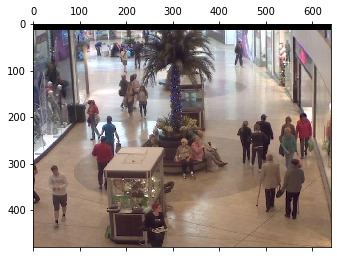

In [ ]:
plt.matshow(img[rvalue], cmap='viridis')

(1, 115, 157, 3)


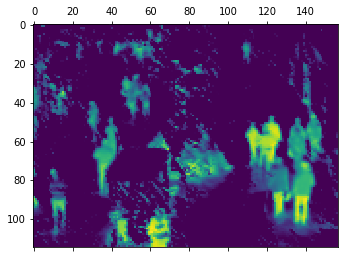

In [ ]:
# Taking Fifthe layer Embeddings to represent the Convolution features of Images
first_layer_activation = a[5]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')

(1, 115, 157, 3)


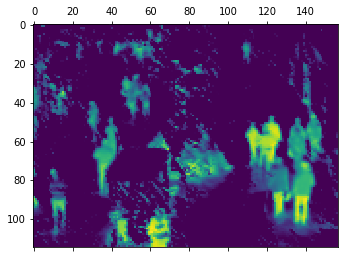

In [ ]:
# Taking Fifthe layer Embeddings to represent the Convolution features of Images
first_layer_activation = a[5]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')

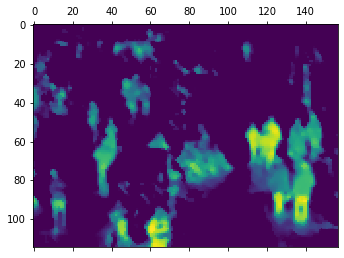

In [ ]:
# Applying the Median Blur Image processing technique to reduce Noise of images
n = first_layer_activation[0, :, :, 0].copy()
n = cv2.medianBlur(n,3)
plt.matshow(n, cmap='viridis')

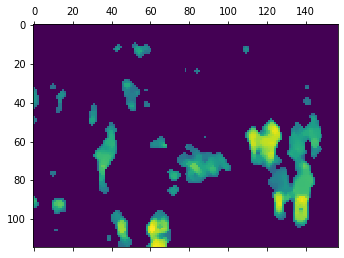

In [ ]:
# Applying the Median Blur Image processing technique to reduce Noise of images
n[n<n.max()/3] = 0
n = cv2.medianBlur(n,3)
plt.matshow(n, cmap='viridis')

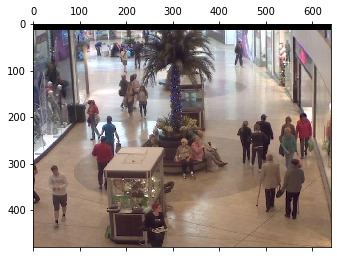

In [ ]:
plt.matshow(img[rvalue], cmap='viridis')

### Contours to detect the groups

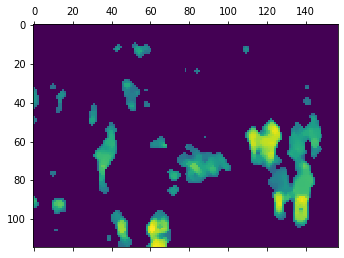

In [ ]:
plt.matshow(n, cmap='viridis')

In [ ]:
# Applyint Contours to detected crowd patterns
df, im1 = ApplyContours(n.copy())

In [ ]:
# Adjusting the multiple contours and the area wise dilation of contours from Camera angle
df, im1, ImSegments = AdjustContours(df, img[rvalue].copy())

In [ ]:
# Filter and zero padding the images to apply on the Crowd Counting model
CrowdGroups  = np.concatenate([FilterImage(word)[np.newaxis] for word in ImSegments])

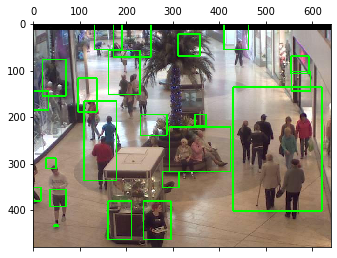

In [ ]:
plt.matshow(im1, cmap='viridis')

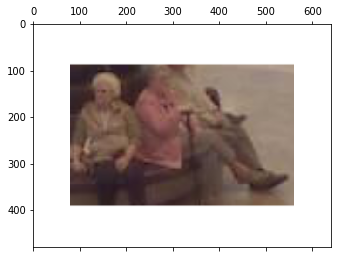

In [ ]:
plt.matshow(CrowdGroups[6], cmap='viridis')

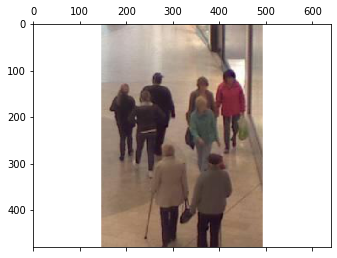

In [ ]:
plt.matshow(CrowdGroups[12], cmap='viridis')

## Model -2 Number of Persons in Each group



In [ ]:
def GetNoofPersons(points, row):
  coords = points[((points[:,0]>row['x']) & (points[:,0]<(row['x']+row['w']))) & ((points[:,1]>row['y']) & (points[:,1]<(row['y']+row['h'])))]
  return coords.shape[0]

def GenerateInsideData(activation_model, array, points, testing=False):
  # Buidling inbetween 6 layer model of trained model
  a = activation_model.predict(array)
  # print(int(model.predict(array)[0][0]), '  -  ', labels[rvalue])

  # Taking Fifthe layer Embeddings to represent the Convolution features of Images
  first_layer_activation = a[5]
  n = first_layer_activation[0, :, :, 0].copy()
  # Applying the Median Blur Image processing technique to reduce Noise of images
  n = cv2.medianBlur(n,3)
  # Applying the Median Blur Image processing technique to reduce Noise of images
  n[n<n.max()/3] = 0
  n = cv2.medianBlur(n,3)

  # Applyint Contours to detected crowd patterns
  df, im1 = ApplyContours(n.copy())

  # Adjusting the multiple contours and the area wise dilation of contours from Camera angle
  df, im1, ImSegments = AdjustContours(df, img[rvalue].copy())

  # Assigning Number of persons associated with the each Cluster cropped
  df['NoofPersons'] = df.apply(lambda x: GetNoofPersons(points, x), 1)

  # Filter and zero padding the images to apply on the Crowd Counting model
  CrowdGroups  = np.concatenate([FilterImage(word)[np.newaxis] for word in ImSegments])
  if testing:
    return df, CrowdGroups, im1
  #df['Images'] = CrowdGroups
  return df, CrowdGroups

In [ ]:
# Assigning Number of persons associated with the each Cluster cropped
df['NoofPersons'] = df.apply(lambda x: GetNoofPersons(points, x), 1)
df['Images'] = CrowdGroups

### Preparing Data for People Counting model

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:8]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [ ]:
img = np.load('images.npy')
img1 = np.load('PreprocessImages.npy')
images_gt=np.load('images_gt.npy',allow_pickle=True)


rvalue = np.random.randint(2000)

# Picking image randomly to apply model
array = img1[rvalue][None,:]
points = images_gt[rvalue]

In [ ]:
%%time
df, CG = GenerateInsideData(activation_model, array, points)

CPU times: user 120 ms, sys: 49.2 ms, total: 169 ms
Wall time: 460 ms


In [ ]:
%%time
dfs = []
CGs = []
for rvalue in range(300):
  array = img1[rvalue][None,:]
  points = images_gt[rvalue]
  df, CG = GenerateInsideData(activation_model, array, points)

  dfs.append(df)
  CGs.append(CG)

CGs = np.concatenate(CGs)
dfs = pd.concat(dfs).reset_index(drop=True)

CPU times: user 26.3 s, sys: 778 ms, total: 27.1 s
Wall time: 24.5 s


In [ ]:
CGs = np.concatenate(CGs)
dfs = pd.concat(dfs)

In [ ]:
# Filter more zeros on noise from images
dfs = dfs[~dfs.index.isin(dfs.loc[dfs['NoofPersons'].eq(0)].iloc[:700].index)]
FilteredIndex = dfs.index
CGs = CGs[FilteredIndex]

In [ ]:


def PatternRecognitionModel(input_shape):
    '''
    Pattern Recognition model consists of 24 Sequential layers 
        6 Convolutional layers followed by relu activation layer.
        5 Fully connected layers followed bye relu activation layer.
    Convolutional layers plays important role in segregating all lane curve extractions and curvation associated information.
    Fully connected layers plays important role in reducing network size layer by layer in extracting curvature of lanes in taking the steering angle prediction
    
    Loss
    ----
    mean squared error loss is considered in optimizing the model performance
    Optimizer
    --------
    Adam optimizer is considered in changing the learning rate to converging Neural network in getting high performance in prediction
    default learning rate of 0.9 to 0.999 increment of optimization with the step of 0.001 is considered
    keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    
    '''
    # Model
    model = Sequential()
# Convolutional
    model.add(Cropping2D(cropping=((5, 5), (0, 0)), input_shape=input_shape))
#     Lambda(lambda image: ktf.image.resize_images(image, (80, 200)))
    model.add(Lambda(lambda x: (x / 255.0) - 0.5))
    model.add(Conv2D(filters=3, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=3, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    
    model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=(2, 2), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1), use_bias=True,
                     kernel_initializer='glorot_uniform', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', dilation_rate=(1, 1),use_bias=True, 
                     kernel_initializer='glorot_uniform',bias_initializer='zeros'))
    model.add(Activation('relu'))
    # Fully connected
    model.add(Flatten())
    model.add(Dense(units=1164))
    model.add(Activation('relu'))
    model.add(Dense(units=100))
    model.add(Activation('relu'))
    model.add(Dense(units=50))
    model.add(Activation('relu'))
    model.add(Dense(units=10))
    model.add(Activation('relu'))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mae'])
    return model



# Splitting data into train and test splits
x_train, x_test, y_train, y_test = train_test_split(CGs, dfs['NoofPersons'].values, test_size=0.2, random_state=43)
print(x_train.shape[0])
print(x_test.shape[0])


# Initializing the Convolutional model
PersonModel = PatternRecognitionModel(x_train[0].shape)

#model = PatternRecognitionModel_API(x_train[0].shape)
PersonModel.summary()




1685
422
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d (Cropping2D)      (None, 470, 640, 3)       0         
_________________________________________________________________
lambda (Lambda)              (None, 470, 640, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 233, 318, 3)       228       
_________________________________________________________________
activation (Activation)      (None, 233, 318, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 115, 157, 3)       228       
_________________________________________________________________
activation_1 (Activation)    (None, 115, 157, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 78, 8) 

In [ ]:
# Hyper parameters considered for model
batch_size = 10
epochs = 100
#Training  the model
PersonModel.fit(x_train, y_train, steps_per_epoch=int(np.ceil(len(x_train) / float(batch_size))), epochs=epochs, workers=4,
                    verbose=1, validation_data=(x_test, y_test), validation_steps=int(np.ceil(len(x_test) / float(batch_size))))

In [ ]:

# # serialize model to JSON
# model_json = PersonModel.to_json()
# with open("drive/My Drive/project/CrowdCounting/PersonModel.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# PersonModel.save_weights("drive/My Drive/project/CrowdCounting/PersonModel.h5")
# print("Saved model to disk")
 


 # load json and create model
json_file = open('drive/My Drive/project/CrowdCounting/PersonModel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
PersonModel = model_from_json(loaded_model_json)
# load weights into new model
PersonModel.load_weights("drive/My Drive/project/CrowdCounting/PersonModel.h5")
print("Loaded model from disk")
 

Loaded model from disk


In [ ]:
CGs.shape

(2107, 480, 640, 3)

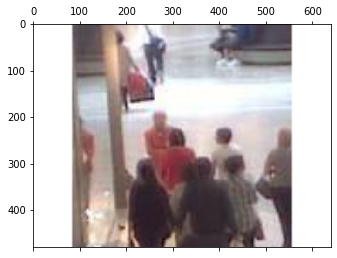

In [ ]:
plt.matshow(CGs[129], cmap='viridis')

In [ ]:
PersonModel.predict(CGs[129][None,:])[0][0]

9.015613

## Testing the Model Cummulatively

In [ ]:
from keras.models import model_from_json
import numpy as np

def Preoprocessimage(a, ModeofImage):
  #a[np.abs(a[:,:,0]-m[:,:,0])<10] = 255
  a[np.abs(a.sum(2) - ModeofImage.sum(2))<25] = 255
  kernel = np.ones((2,2),np.uint8)
  b = cv2.morphologyEx(a, cv2.MORPH_OPEN, kernel)
  b = cv2.GaussianBlur(b,(3,3),0)
  return b

def GetNoofPersons(points, row):
  coords = points[((points[:,0]>row['x']) & (points[:,0]<(row['x']+row['w']))) & ((points[:,1]>row['y']) & (points[:,1]<(row['y']+row['h'])))]
  return coords.shape[0]

def GenerateInsideData(activation_model, array, points, image, testing=False):
  # Buidling inbetween 6 layer model of trained model
  a = activation_model.predict(array)
  # print(int(model.predict(array)[0][0]), '  -  ', labels[rvalue])

  # Taking Fifthe layer Embeddings to represent the Convolution features of Images
  first_layer_activation = a[5]
  n = first_layer_activation[0, :, :, 0].copy()
  # Applying the Median Blur Image processing technique to reduce Noise of images
  n = cv2.medianBlur(n,3)
  # Applying the Median Blur Image processing technique to reduce Noise of images
  n[n<n.max()/3] = 0
  n = cv2.medianBlur(n,3)

  # Applyint Contours to detected crowd patterns
  df, im1 = ApplyContours(n.copy())

  # Adjusting the multiple contours and the area wise dilation of contours from Camera angle
  df, im2, ImSegments = AdjustContours(df, image.copy())

  # Assigning Number of persons associated with the each Cluster cropped
  df['NoofPersons'] = df.apply(lambda x: GetNoofPersons(points, x), 1)

  # Filter and zero padding the images to apply on the Crowd Counting model
  CrowdGroups  = np.concatenate([FilterImage(word)[np.newaxis] for word in ImSegments])
  if testing:
    return df, CrowdGroups,n,im2
  #df['Images'] = CrowdGroups
  return df, CrowdGroups


def PlotGroups(im1, df1, font=0.7):
  for ind, row in df1.iterrows():
      x,y,w,h = row[['x','y','w','h']].astype(int).values
      cv2.rectangle(im1,(x,y),(x+w,y+h),(0,255,0),2)
      cv2.putText(im1, 'group size - '+ str(int(row['NoofPersons'])), 
                  (x,y+20),  cv2.FONT_HERSHEY_SIMPLEX , font, (255, 0, 0), 2, cv2.LINE_AA) 
  return im1


# load json and create model
json_file = open('drive/My Drive/project/CrowdCounting/model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
GroupModel = model_from_json(loaded_model_json)
# load weights into new model
GroupModel.load_weights("drive/My Drive/project/CrowdCounting/model1.h5")
print("Loaded model from disk")
 
ModeofImage = np.load('drive/My Drive/project/CrowdCounting/ModeOfImage.npy')



# load json and create model
json_file = open('drive/My Drive/project/CrowdCounting/PersonModel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
PersonModel = model_from_json(loaded_model_json)
# load weights into new model
PersonModel.load_weights("drive/My Drive/project/CrowdCounting/PersonModel.h5")
print("Loaded model from disk")
 

Loaded model from disk
Loaded model from disk


In [ ]:
# Downlaod data for the nyc_taxi_trip_duration challenge
!kaggle datasets download -d fmena14/crowd-counting
!unzip -qq crowd-counting.zip
# Load Data
img = np.load('images.npy')


In [ ]:
# Extracts the outputs of the top 12 layers
layer_outputs = [layer.output for layer in  GroupModel.layers[:12]] 
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=GroupModel.input, outputs=layer_outputs) 

In [ ]:
# Testing on one random image
rvalue = np.random.randint(2000)
image = img[rvalue]
array = Preoprocessimage(image.copy(), ModeofImage)[None,:]

In [ ]:
%%time
df, CG, n, im2 = GenerateInsideData(activation_model, array, points, image.copy(), testing=True)

CPU times: user 170 ms, sys: 2.67 ms, total: 173 ms
Wall time: 159 ms


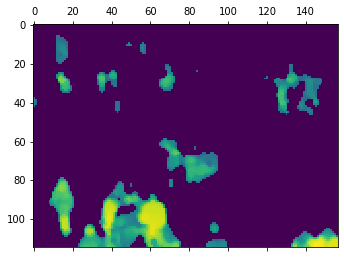

In [ ]:
plt.matshow(n, cmap='viridis')

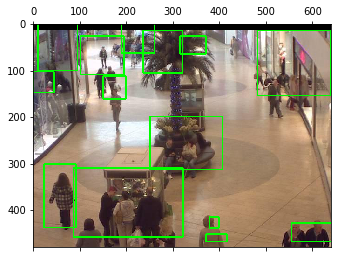

In [ ]:
plt.matshow(im2, cmap='viridis')

In [ ]:
df['NoofPersons'] = PersonModel.predict(CG).flatten()
df1 = df.loc[df['NoofPersons']>3]

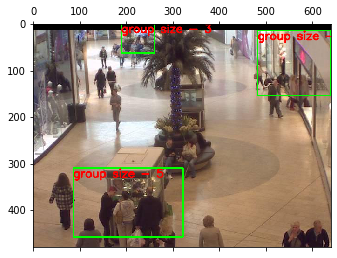

In [ ]:
im1 = image.copy()
PlotGroups(im1, df1, font=0.8)
plt.matshow(im1, cmap='viridis')

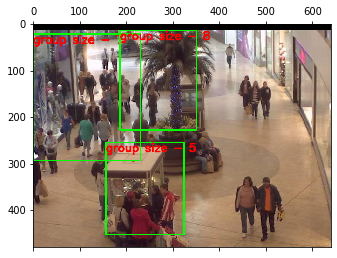

In [ ]:
im1 = image.copy()
PlotGroups(im1, df1, font=0.8)
plt.matshow(im1, cmap='viridis')

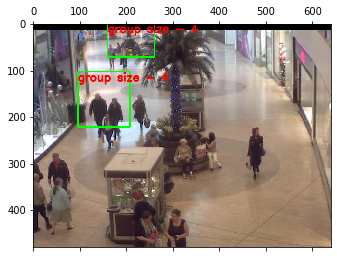

In [ ]:
im1 = image.copy()
PlotGroups(im1, df1, font=0.8)
plt.matshow(im1, cmap='viridis')

In [ ]:
df1

,x,y,w,h,area,thr,NoofPersons
10,96,104,112,118,223.5,25,4.557463
15,160,0,101,72,28.0,40,4.771924


In [ ]:
for i in np.arange(50):
  im1 = img[i]
  cv2.imwrite('drive/My Drive/project/CrowdCounting/Data/Image-{}.jpg'.format(str(i)), im1)

In [ ]:

# load json and create model
json_file = open('drive/My Drive/project/CrowdCounting/model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
GroupModel = model_from_json(loaded_model_json)
# load weights into new model
GroupModel.load_weights("drive/My Drive/project/CrowdCounting/model1.h5")
print("Loaded model from disk")

Loaded model from disk


## DataSets explored

In [ ]:
# https://github.com/gjy3035/Awesome-Crowd-Counting/blob/master/src/Datasets.md

In [ ]:
# !wget http://visal.cs.cityu.edu.hk/static/downloads/ucsdpeds_vidd.zip

# !mkdir data1
# !cp ucsdpeds_vidd.zip data1/ucsdpeds_vidd.zip
# %cd data1
# !unzip -qq ucsdpeds_vidd.zip
# # import os
# # os.listdir('video/vidd')

# # WasteData
# Irregular format need to understanding time taking


In [ ]:
# !wget http://www.vision.caltech.edu/Image_Datasets/CaltechPedestrians/datasets/USA/
# Tooo much of data with videos 
# Wont Work

In [ ]:
# !wget https://doc-14-1c-docs.googleusercontent.com/docs/securesc/pcl26q7pr82be4675798ftbc6t00rj5j/lhcs3a5e6q5orf4ebutontjd4rdq8nh0/1606979250000/15424859768005087218/10567653989436125084Z/1OZv7JvgmTAW7_E5RRTno0T9pdGK1XFv6?e=download&nonce=t8b2h8blm6vq0&user=10567653989436125084Z&hash=4al289ov8mk8aiaks6qoujco90h5nitq
# # Seq data w.r.t their convention, understanding take 2 days time